In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We retrieved disordered region information from MobiDb

In [3]:
mobi1 = pd.read_csv("mobidb_result_2022-03-03T09_47_39.301Z.tsv", sep="\t")
print(mobi1.shape[0])
mobi1.head()

1241631


,acc,feature,start..end,content_fraction,content_count,length
0,C0HLV8,prediction-disorder-th_50,"1..4,22..31",0.452,14,31
1,C0HLV8,prediction-low_complexity-merge,8..17,0.323,10,31
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
3,C0HLV8,prediction-disorder-espN,"1..3,28..31",0.226,7,31
4,C0HLV8,prediction-disorder-espD,1..31,1.000,31,31


In [4]:
mobi1["acc"].nunique()

78106

In [5]:
mobi1[mobi1["feature"].str.contains("homology")]["feature"].value_counts()

homology-domain-merge                                  57280
homology-domain-pfam                                   53966
homology-domain-gene3d                                 29775
homology-disorder-merge                                 1074
homology-disorder-priority                              1059
homology-disorder-disprot                                823
homology-lip-merge                                       621
homology-lip-priority                                    588
homology-conformational_diversity-merge                  463
homology-conformational_diversity-codnas                 463
homology-disorder-ideal                                  411
homology-lip-disprot                                     338
homology-lip-dibs                                        229
homology-binding_mode_disorder_to_disorder-fuzdb         154
homology-binding_mode_disorder_to_disorder-merge         154
homology-binding_mode_disorder_to_disorder-priority      154
homology-lip-ideal      

In [6]:
mobi1[mobi1["feature"].str.contains("th_90")]["feature"].value_counts()

derived-observed-th_90                              7269
derived-missing_residues-th_90                      5448
derived-missing_residues_context_dependent-th_90    5045
derived-mobile_context_dependent-th_90              1974
derived-mobile-th_90                                1803
derived-lip-th_90                                   1757
Name: feature, dtype: int64

In [7]:
mobi1[(mobi1["feature"].str.contains("curated")==False)&(mobi1["feature"].str.contains("th_90")==False)&
           (mobi1["feature"].str.contains("lip")==True)&(mobi1["feature"].str.contains("homology-disorder-uniprot")==False)
    ]["feature"].value_counts()

prediction-lip-anchor      57042
prediction-lip-priority     2273
derived-lip-merge           2248
derived-lip-priority        1531
homology-lip-merge           621
homology-lip-priority        588
homology-lip-disprot         338
homology-lip-dibs            229
homology-lip-ideal           104
homology-lip-mfib             80
homology-lip-elm              32
Name: feature, dtype: int64

In [8]:
mobi = mobi1[(((mobi1["feature"].str.contains("curated"))|(mobi1["feature"].str.contains("disorder-mobidb_lite"))|
               (mobi1["feature"].str.contains("prediction-disorder-iups"))|(mobi1["feature"].str.contains("prediction-disorder-iupl"))|
           ((mobi1["feature"].str.contains("homology"))&(mobi1["feature"].str.contains("homology-domain")==False)))&
                                                               ((mobi1["feature"].str.contains("lip")==False)&
                                                               (mobi1["feature"].str.contains("binding_mode")==False)))]
mobi.rename(columns={"acc": "ACC_ID"}, inplace=True)
print(mobi.shape[0])
mobi.head()

183635


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ACC_ID,feature,start..end,content_fraction,content_count,length
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
15,A0A7P0T821,prediction-disorder-iupl,"4..5,8..24,48..60",0.533,32,60
16,A0A7P0T821,prediction-disorder-iups,"1..10,14..24,52..60",0.500,30,60
28,A0A7P0TA09,prediction-disorder-iups,"1..5,254..256",0.031,8,256
37,A0A7P0T8G2,prediction-disorder-iupl,"1..4,6..17,24..29,43..44,48..49,52..52,67..68,...",0.391,109,279


In [9]:
mobi["feature"].value_counts()

prediction-disorder-iups                    77579
prediction-disorder-iupl                    62131
prediction-disorder-mobidb_lite             34865
curated-disorder-priority                    1189
curated-disorder-merge                       1189
homology-disorder-merge                      1074
homology-disorder-priority                   1059
homology-disorder-disprot                     823
curated-disorder-disprot                      722
curated-disorder-ideal                        679
homology-conformational_diversity-merge       463
homology-conformational_diversity-codnas      463
homology-disorder-ideal                       411
curated-conformational_diversity-merge        385
curated-conformational_diversity-codnas       385
curated-phase_separation-merge                 55
curated-phase_separation-phasepro              55
homology-phase_separation-merge                40
homology-phase_separation-phasepro             40
curated-disorder-uniprot                       26


In [10]:
data_site= pd.read_csv("site_data", sep="\t")
data_site.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
proteins_mobi = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi.shape[0])
proteins_mobi.head()

82923


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66


In [12]:
proteins_mobi1 = proteins_mobi["start..end"].str.split(",", expand=True)

In [13]:
proteins_mobi = pd.merge(proteins_mobi, proteins_mobi1, how="inner", left_index=True, right_index=True)
print(proteins_mobi.shape[0])
proteins_mobi.head()

82923


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040
0,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,32,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
1,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,39,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
2,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,47,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
3,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,65,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None
4,P31946,prediction-disorder-iupl,"2..2,8..9,12..12,25..26,29..34,36..36,65..84,1...",0.248,61,246,66,2..2,8..9,12..12,...,None,None,None,None,None,None,None,None,None,None


In [15]:
proteins_mobi_sub_tot = pd.DataFrame({})
for i in range (1041):
    proteins_mobi_sub = proteins_mobi[~proteins_mobi[i].isnull()]
    proteins_mobi_sub = proteins_mobi.loc[proteins_mobi["UP_POS"].astype(float, copy=False).between(proteins_mobi[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot = proteins_mobi_sub_tot.append(proteins_mobi_sub, ignore_index=True)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [16]:
for i in range(1041):
    proteins_mobi_sub_tot.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot.shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

4734
439


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P22314,homology-conformational_diversity-codnas,202..312,0.105,111,1058,273
1,P22314,homology-conformational_diversity-codnas,202..312,0.105,111,1058,309
2,P22314,homology-conformational_diversity-merge,202..312,0.105,111,1058,273
3,P22314,homology-conformational_diversity-merge,202..312,0.105,111,1058,309
4,P17480,curated-conformational_diversity-codnas,479..560,0.107,82,764,484


In [17]:
#proteins_mobi_sub_tot.to_csv("Mobi_DB annotation_proteins", sep="\t", index=False)

We'll now add this data to the three categories of proteins respectively.

# 1. Tissue-specific phosphorylated proteins, tissue aspecific phosphorylated proteins, pervasively phosphorylated proteins

We have selected disordered regions from MobiDB based on where MobiDB has retrieved its information, or where it has been identified, and limited this to the regions in which a phosphosites from our dataset is present. We'll now combine this data with the tissue-specific phosphorylated proteins, the tissue aspecific phosphorylated proteins and the pervasively phosphorylated proteins. In order to do this, we retrieve the previously stored infomation of which proteins belong to which category, and add the site data to this, after which we merge the data for these three categories with the MobiDB annotation.

In [14]:
proteins_mobi_sub_tot = pd.read_csv("Mobi_DB annotation_proteins", sep="\t")
print(proteins_mobi_sub_tot.shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

44413
4116


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P63104,prediction-disorder-iupl,"30..31,66..66,70..70,72..81,153..154,231..245",0.127,31,245,30
1,Q53H54,prediction-disorder-iupl,"1..9,49..49,54..54,56..60,62..62,70..70,72..74...",0.132,59,448,8
2,Q53H54,prediction-disorder-iups,"1..9,60..61,63..63,72..75,85..86,89..91,96..98...",0.112,50,448,8
3,P10074,prediction-disorder-iupl,"121..198,201..253,258..258,272..274,276..281,2...",0.256,176,688,171
4,P26368,prediction-disorder-mobidb_lite,1..90,0.189,90,475,79


In [15]:
t_spec_prot = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
non_t_spec_prot = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
general_P_prot = pd.read_csv("1.1 general P proteins", sep="\t")

In [16]:
tspec_prot = pd.merge(t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(tspec_prot.shape[0])
print(tspec_prot["ACC_ID"].nunique())
tspec_prot_mobi = pd.merge(tspec_prot, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_prot_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["feature"].count().shape[0])
print(tspec_prot_mobi["ACC_ID"].nunique())
tspec_prot_mobi.head()

2794
2029
1548
1100


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-disorder-mobidb_lite,1..108,1.000,108,108
1,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-disorder-iupl,1..108,1.000,108,108
2,A0A0U1RRK4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,41,prediction-disorder-iups,"1..33,37..51,53..108",0.963,104,108
3,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,491,prediction-disorder-mobidb_lite,"140..194,223..351,364..433,449..468,481..506,7...",0.486,391,805
4,A0A1B0GTU1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,491,prediction-disorder-iupl,"100..200,216..216,220..433,437..437,443..511,5...",0.733,590,805


In [17]:
taspec_prot = pd.merge(non_t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(taspec_prot.shape[0])
print(taspec_prot["ACC_ID"].nunique())
taspec_prot_mobi = pd.merge(taspec_prot, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_prot_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["feature"].count().shape[0])
print(taspec_prot_mobi["ACC_ID"].nunique())
taspec_prot_mobi.head()

7371
2074
5142
1568


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
1,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,68,prediction-disorder-iups,"1..10,12..12,20..22,28..29,33..34,36..64,68..6...",0.353,306,867
2,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,2,102,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
3,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,prediction-disorder-mobidb_lite,"1..56,171..244",0.533,130,244
4,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,prediction-disorder-iups,"1..57,120..120,161..244",0.582,142,244


In [18]:
gen_prot = pd.merge(general_P_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(gen_prot.shape[0])
print(gen_prot["ACC_ID"].nunique())
gen_prot_mobi = pd.merge(gen_prot, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_prot_mobi.groupby(["ACC_ID", "UP_POS"],as_index=False)["feature"].count().shape[0])
print(gen_prot_mobi["ACC_ID"].nunique())
gen_prot_mobi.head()

13738
1752
9570
1448


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
2,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,736,prediction-disorder-iupl,"1..34,37..45,47..104,519..521,552..572,576..57...",0.353,325,921
3,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
4,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,5,737,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921


<AxesSubplot:title={'center':'Number of annotated proteins in each of the three categories'}, xlabel='Tissue'>

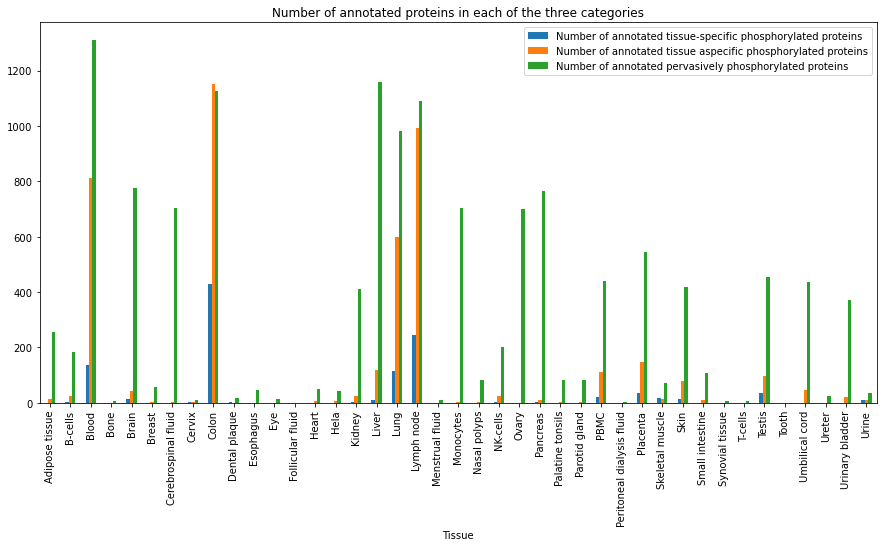

In [19]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi.loc[tspec_prot_mobi[tissue]==1]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi.loc[taspec_prot_mobi[tissue]==1]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi.loc[gen_prot_mobi[tissue]==1]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues = pd.DataFrame({"Tissue": list_tissues_STY, "Number of annotated tissue-specific phosphorylated proteins": tspec_counts,
                             "Number of annotated tissue aspecific phosphorylated proteins": taspec_counts,
                             "Number of annotated pervasively phosphorylated proteins": gen_counts})
distr_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title = "Number of annotated proteins in each of the three categories")
#plt.savefig("WP2 MobiDB_tissues_phosphoproteins.png", format="png", bbox_inches="tight")

In [20]:
distr_tissues

,Tissue,Number of annotated tissue-specific phosphorylated proteins,Number of annotated tissue aspecific phosphorylated proteins,Number of annotated pervasively phosphorylated proteins
0,Adipose tissue,0,15,256
1,B-cells,3,24,183
2,Blood,136,811,1309
3,Bone,0,0,6
4,Brain,12,44,777
5,Breast,0,3,58
6,Cerebrospinal fluid,1,4,705
7,Cervix,3,2,10
8,Colon,429,1150,1125
9,Dental plaque,3,0,16


In [21]:
missing_tspec = pd.merge(t_spec_prot, tspec_prot_mobi, how="outer", on=["ACC_ID"], indicator=True)
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
missing_tspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_tspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_tspec.drop(["Total_y"], axis=1, inplace=True)
print(missing_tspec["ACC_ID"].nunique())
missing_tspec

929


,ACC_ID,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,Cerebrospinal fluid_x,Cervix_x,Colon_x,...,Synovial tissue_x,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,UP_POS
0,A0A075B6H7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
1,A0A075B6S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
2,A0A087WXM9,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,NaN
3,A0A0B4J2D5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4,A0A0B4J2D9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Q9Y678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4797,Q9Y6H5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4801,Q9Y6K5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4802,Q9Y6N5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [22]:
missing_nontspec = pd.merge(non_t_spec_prot, taspec_prot_mobi, how="outer", on=["ACC_ID"], indicator=True)
missing_nontspec = missing_nontspec[missing_nontspec["_merge"]=="left_only"]
missing_nontspec.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_nontspec.drop([tissue+"_y"], axis=1, inplace=True)
missing_nontspec.drop(["Total_y"], axis=1, inplace=True)
print(missing_nontspec["ACC_ID"].nunique())
missing_nontspec.head()

506


,ACC_ID,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,Cerebrospinal fluid_x,Cervix_x,Colon_x,...,Synovial tissue_x,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,UP_POS
0,A0A0C4DH36,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
66,A3KN83,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,NaN
96,A6NCF6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4,NaN
103,A6ND91,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4,NaN
163,A8MT19,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,NaN


In [23]:
missing_genP = pd.merge(general_P_prot, gen_prot_mobi, how="outer", on=["ACC_ID"], indicator=True)
missing_genP = missing_genP[missing_genP["_merge"]=="left_only"]
missing_genP.drop(["feature", "start..end", "content_fraction",
                  "content_count", "length", "_merge"], axis=1, inplace=True)
for tissue in list_tissues_STY:
    missing_genP.drop([tissue+"_y"], axis=1, inplace=True)
missing_genP.drop(["Total_y"], axis=1, inplace=True)
print(missing_genP.shape[0])
missing_genP.head()

304


,ACC_ID,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,Cerebrospinal fluid_x,Cervix_x,Colon_x,...,Synovial tissue_x,T-cells_x,Testis_x,Tooth_x,Umbilical cord_x,Ureter_x,Urinary bladder_x,Urine_x,Total_x,UP_POS
0,A0A0C4DH39,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN
50,A6NEL2,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,8,NaN
51,A6NIJ9,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN
92,A6NNZ2,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN
130,B1ANY3,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,NaN


We add the amount of missing proteins, per tissue, per category, to the dataframe that contains the number of proteins in each of the three categories. The loss of proteins seems to be spreadin accordance to the number of proteins identified as being tissue-specific, tissue aspecific and pervasively phosphorylated proteins.

In [24]:
list_missing_tspec = []
list_missing_nontspec = []
list_missing_genP = []
list_all_tspec = []
list_all_genP = []
for tissue in list_tissues_STY:
    tissue=tissue+"_x"
    count_missing_tspec = missing_tspec[tissue].sum()
    count_missing_nontspec = missing_nontspec[tissue].sum()
    count_missing_genP = missing_genP[tissue].sum()
    list_missing_tspec.append(count_missing_tspec)
    list_missing_nontspec.append(count_missing_nontspec)
    list_missing_genP.append(count_missing_genP)
missing = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
missing["missing tissue-specific phosphorylated proteins"] = list_missing_tspec
missing["missing tissue aspecific phosphorylated proteins"] = list_missing_nontspec
missing["missing pervasively phosphorylated proteins"] = list_missing_genP

<AxesSubplot:title={'center':'Proteins having no phosphosite in a disordered region'}, xlabel='Tissue'>

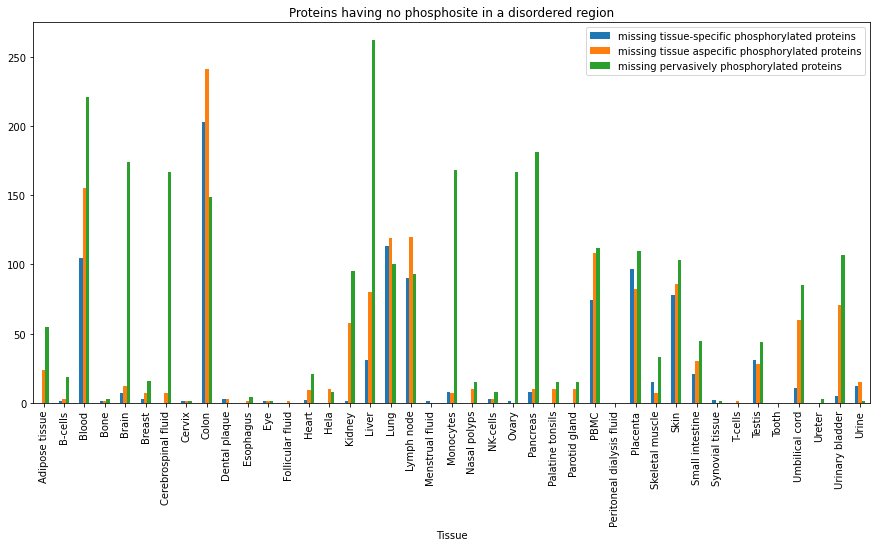

In [25]:
missing[["Tissue", "missing tissue-specific phosphorylated proteins", "missing tissue aspecific phosphorylated proteins", "missing pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Proteins having no phosphosite in a disordered region")

In [26]:
missing

,Tissue,number of tissue-specific proteins,number of non tissue-specific proteins,number of generally expressed proteins,Total,missing tissue-specific phosphorylated proteins,missing tissue aspecific phosphorylated proteins,missing pervasively phosphorylated proteins
0,Adipose tissue,0,39,311,350,0,24,55
1,B-cells,4,27,202,233,1,3,19
2,Blood,241,966,1530,2737,105,155,221
3,Bone,1,1,9,11,1,1,3
4,Brain,19,56,951,1026,7,12,174
5,Breast,3,10,74,87,3,7,16
6,Cerebrospinal fluid,1,11,872,884,0,7,167
7,Cervix,4,3,11,18,1,1,1
8,Colon,632,1391,1274,3297,203,241,149
9,Dental plaque,6,3,16,25,3,3,0


<AxesSubplot:title={'center':'Number of annotated tissue-speecific phosphorylated proteins compared to non-annotated'}, xlabel='Tissue'>

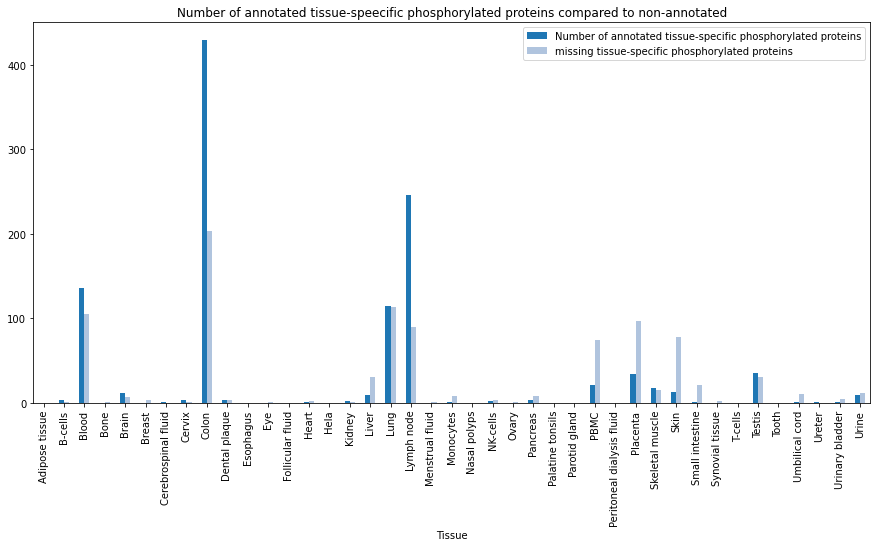

In [27]:
distr_tissues_comp = pd.merge(distr_tissues, missing[["Tissue","missing tissue-specific phosphorylated proteins", 
                                                     "missing tissue aspecific phosphorylated proteins",
                                                     "missing pervasively phosphorylated proteins"]], how="inner", on="Tissue")
distr_tissues_tspec = distr_tissues_comp[["Tissue", "Number of annotated tissue-specific phosphorylated proteins", "missing tissue-specific phosphorylated proteins"]].copy()
distr_tissues_taspec = distr_tissues_comp[["Tissue", "Number of annotated tissue aspecific phosphorylated proteins", "missing tissue aspecific phosphorylated proteins"]]
distr_tissues_gen = distr_tissues_comp[["Tissue", "Number of annotated pervasively phosphorylated proteins", "missing pervasively phosphorylated proteins"]]


distr_tissues_tspec.plot(kind="bar", x="Tissue", color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Number of annotated tissue-speecific phosphorylated proteins compared to non-annotated")

<AxesSubplot:title={'center':'Number of annotated tissue aspeecific phosphorylated proteins compared to non-annotated'}, xlabel='Tissue'>

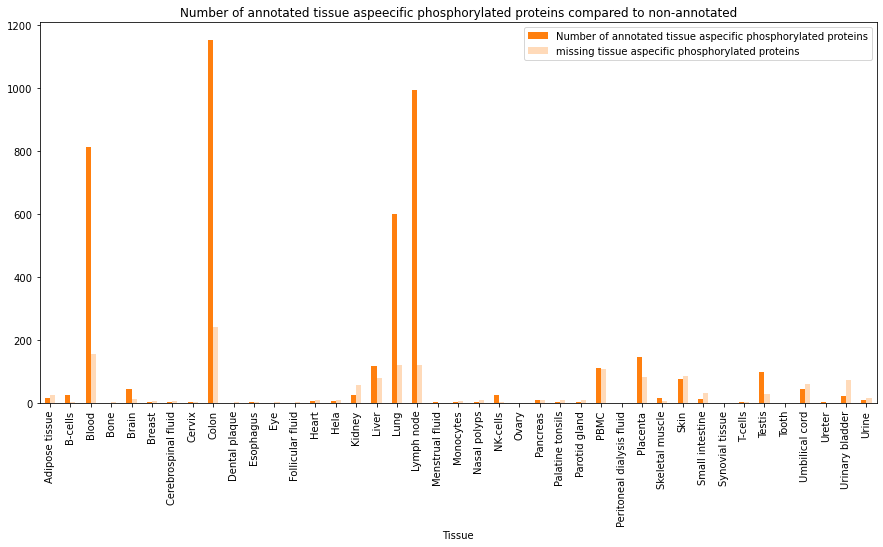

In [28]:
distr_tissues_taspec.plot(kind="bar", x="Tissue", color=["tab:orange","peachpuff"], figsize=(15,7), title="Number of annotated tissue aspeecific phosphorylated proteins compared to non-annotated")

<AxesSubplot:title={'center':'Number of annotated pervasively phosphorylated proteins compared to non-annotated'}, xlabel='Tissue'>

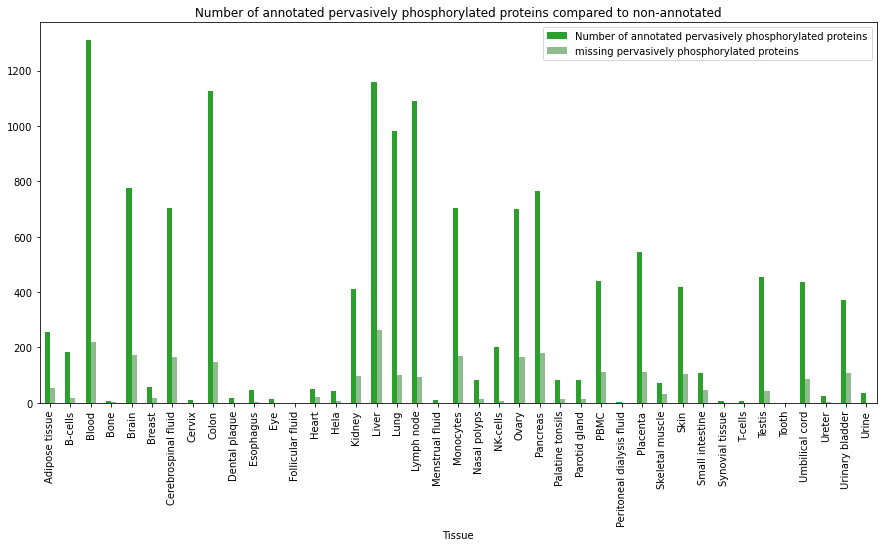

In [29]:
distr_tissues_gen.plot(kind="bar", x="Tissue", color=["tab:green", "darkseagreen"], figsize=(15,7), title="Number of annotated pervasively phosphorylated proteins compared to non-annotated")

## Number of proteins having disordered regions per category

We'll now, for each category, calculate how many proteins are annotated with a disordered region. Despite there being less pervasively phorphorylated proteins, they are much better represented.

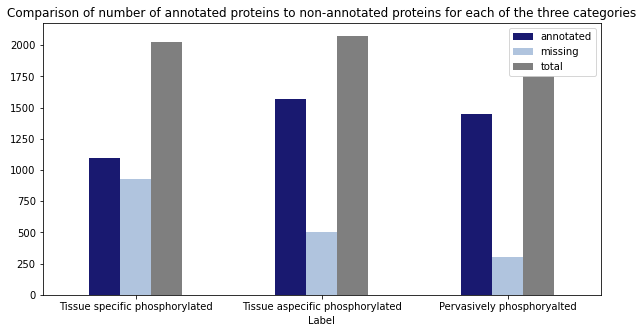

In [30]:
annotated = [tspec_prot_mobi["ACC_ID"].nunique(), taspec_prot_mobi["ACC_ID"].nunique(), gen_prot_mobi["ACC_ID"].nunique()]
             
missed = [missing_tspec["ACC_ID"].nunique(),
          missing_nontspec["ACC_ID"].nunique(),
          missing_genP["ACC_ID"].nunique()]

total = [annotated[0]+missed[0], annotated[1]+missed[1], annotated[2]+missed[2]]

three_cat = pd.DataFrame({"Label": ["Tissue specific phosphorylated", "Tissue aspecific phosphorylated",
                                   "Pervasively phosphoryalted"], "annotated": annotated, "missing": missed, "total":total})
three_cat.plot(kind="bar", x="Label" ,color=["midnightblue", "lightsteelblue", "tab:grey"], figsize=(10,5), title="Comparison of number of annotated proteins to non-annotated proteins for each of the three categories", rot=0)
#plt.savefig("WP2 MobiDB ratio annotated per cat_phosphoproteins.png", format="png", bbox_inches="tight")

In [31]:
three_cat["ratio_annotated"] = three_cat["annotated"]*100/three_cat["total"]
three_cat

,Label,annotated,missing,total,ratio_annotated
0,Tissue specific phosphorylated,1100,929,2029,54.213898
1,Tissue aspecific phosphorylated,1568,506,2074,75.602700
2,Pervasively phosphoryalted,1448,304,1752,82.648402


# Comparison of sites in disordered regions and outside disordered regions on the same protein

We go back to the annotation dataframe containing all annotation for all proteins in our data, regardless of the phosphosites occuring in the disordered region or not. We then make an indicator column that will display False for the records for which the phosphosite occurs in the disordered region. We select the records for which the phosphosites does not occur in a disordered region.

In [37]:
#not rerun
outside_mobi_sub = proteins_mobi.copy()
list_cols = []
for i in range (1041):
    colname = "indicator"+str(i)
    list_cols.append(colname)
    outside_mobi_sub[colname] = True
    outside_mobi_sub.loc[outside_mobi_sub["UP_POS"].astype(float, copy=False).between(outside_mobi_sub[i].str.partition("..")[0].astype(float, copy=False), outside_mobi_sub[i].str.partition("..")[2].astype(float, copy=False)), colname] = False
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [39]:
outside_mobi_sub1 = outside_mobi_sub[outside_mobi_sub[list_cols].all(axis=1)]
outside_mobi_sub1
for i in range(28):
    outside_mobi_sub1.drop(i, axis=1, inplace=True)
    col = "indicator"+str(i)
    outside_mobi_sub1.drop(col, axis=1, inplace=True)
    print(i)
outside_mobi_sub1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,32
1,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,39
2,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,47
3,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,65
4,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,66
...,...,...,...,...,...,...,...
16126,Q13085,curated-disorder-merge,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,77
16130,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,23
16131,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,25
16132,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,29


In [40]:
tspec_proteins_out = pd.merge(tspec_prot[["ACC_ID", "UP_POS"]], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
print(tspec_proteins_out["ACC_ID"].nunique())
print(tspec_proteins_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
tspec_proteins_out

184
268


,ACC_ID,UP_POS,feature,start..end,content_fraction,content_count,length
0,O00204,350,curated-disorder-disprot,13..26,0.038,14,365
1,O00204,350,curated-disorder-merge,13..26,0.038,14,365
2,O00204,350,curated-disorder-priority,13..26,0.038,14,365
3,O00268,1027,curated-disorder-ideal,"575..582,680..688,920..945",0.040,43,1085
4,O00268,1027,curated-disorder-disprot,408..838,0.397,431,1085
...,...,...,...,...,...,...,...
836,Q9Y263,640,curated-conformational_diversity-merge,386..465,0.101,80,795
837,Q9Y263,640,curated-disorder-priority,"340..392,457..465,511..531,633..633,693..693,7...",0.112,89,795
838,Q9Y3M8,411,curated-conformational_diversity-codnas,56..120,0.058,65,1113
839,Q9Y3M8,411,curated-conformational_diversity-merge,56..120,0.058,65,1113


In [41]:
sublist_tissues = list_tissues_STY.copy()
sublist_tissues.insert(0, "ACC_ID")
sublist_tissues.insert(1, "UP_POS")
sublist_tissues

['ACC_ID',
 'UP_POS',
 'Adipose tissue',
 'B-cells',
 'Blood',
 'Bone',
 'Brain',
 'Breast',
 'Cerebrospinal fluid',
 'Cervix',
 'Colon',
 'Dental plaque',
 'Esophagus',
 'Eye',
 'Follicular fluid',
 'Heart',
 'Hela',
 'Kidney',
 'Liver',
 'Lung',
 'Lymph node',
 'Menstrual fluid',
 'Monocytes',
 'Nasal polyps',
 'NK-cells',
 'Ovary',
 'Pancreas',
 'Palatine tonsils',
 'Parotid gland',
 'PBMC',
 'Peritoneal dialysis fluid',
 'Placenta',
 'Skeletal muscle',
 'Skin',
 'Small intestine',
 'Synovial tissue',
 'T-cells',
 'Testis',
 'Tooth',
 'Umbilical cord',
 'Ureter',
 'Urinary bladder',
 'Urine']

In [42]:
tspec_proteins_inandout_out = pd.merge(tspec_prot_mobi[sublist_tissues], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
tspec_proteins_inandout_out

,ACC_ID,UP_POS,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,feature,start..end,content_fraction,content_count,length
0,O43665,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-conformational_diversity-codnas,23..158,0.751000,136,181
1,O43665,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-conformational_diversity-merge,23..158,0.751000,136,181
2,O43665,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-conformational_diversity-codnas,23..158,0.751000,136,181
3,O43665,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-conformational_diversity-merge,23..158,0.751000,136,181
4,O43665,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-conformational_diversity-codnas,23..158,0.751000,136,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Q9BYJ9,398,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-uniprot,"1..49,239..365",0.314848,176,559
150,Q9BYJ9,398,0,0,0,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-uniprot,"1..49,239..365",0.314848,176,559
151,Q9Y4P1,383,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,"187..217,384..393",0.104000,41,393
152,Q9Y4P1,383,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,"187..217,384..393",0.104000,41,393


In [43]:
tspec_proteins_inandout_in = pd.merge(tspec_proteins_inandout_out["ACC_ID"], tspec_prot_mobi, on=["ACC_ID"], how="inner")
tspec_proteins_inandout_in

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,O43665,0,0,0,0,0,0,0,0,0,...,0,0,0,1,16,curated-disorder-ideal,"9..23,103..113,146..152",0.182,33,181
1,O43665,0,0,0,0,0,0,0,0,0,...,0,0,0,1,16,curated-disorder-merge,"9..23,103..113,146..152",0.182,33,181
2,O43665,0,0,0,0,0,0,0,0,0,...,0,0,0,1,16,curated-disorder-priority,"9..23,103..113,146..152",0.182,33,181
3,O43665,0,0,0,0,0,0,0,0,0,...,0,0,0,1,26,curated-conformational_diversity-codnas,23..158,0.751,136,181
4,O43665,0,0,0,0,0,0,0,0,0,...,0,0,0,1,26,curated-conformational_diversity-merge,23..158,0.751,136,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,Q9Y4P1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,383,curated-disorder-merge,"1..9,187..217,288..293,340..346,356..361,374..393",0.201,79,393
564,Q9Y4P1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,383,curated-disorder-priority,"1..9,187..217,288..293,340..346,356..361,374..393",0.201,79,393
565,Q9Y4P1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,383,curated-disorder-ideal,"1..9,187..217,288..293,340..346,356..361,374..393",0.201,79,393
566,Q9Y4P1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,383,curated-disorder-merge,"1..9,187..217,288..293,340..346,356..361,374..393",0.201,79,393


678 tissue-specific phosphorylated proteins have 897 phosphosites inside a disordered region, and 889 phosphosites outside a disordered region.

In [44]:
print(tspec_proteins_inandout_in["ACC_ID"].nunique())
print(tspec_proteins_inandout_out["ACC_ID"].nunique())
print(tspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
print(tspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])

25
25
32
32


In [45]:
taspec_proteins_out = pd.merge(taspec_prot[["ACC_ID", "UP_POS"]], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
print(taspec_proteins_out["ACC_ID"].nunique())
print(taspec_proteins_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
taspec_proteins_out

259
895


,ACC_ID,UP_POS,feature,start..end,content_fraction,content_count,length
0,A6NI72,346,homology-disorder-disprot,214..229,0.041,16,391
1,A6NI72,346,homology-disorder-merge,214..229,0.041,16,391
2,A6NI72,346,homology-disorder-priority,214..229,0.041,16,391
3,A6NI72,349,homology-disorder-disprot,214..229,0.041,16,391
4,A6NI72,349,homology-disorder-merge,214..229,0.041,16,391
...,...,...,...,...,...,...,...
2828,Q9Y6J0,2154,curated-disorder-merge,"2156..2158,2185..2190",0.004,9,2220
2829,Q9Y6J0,2154,curated-disorder-priority,"2156..2158,2185..2190",0.004,9,2220
2830,Q9Y6K1,105,curated-disorder-ideal,"51..53,275..282,385..397,426..427,455..473,577...",0.087,79,912
2831,Q9Y6K1,105,curated-disorder-merge,"51..53,275..282,385..397,426..427,455..473,577...",0.087,79,912


In [46]:
taspec_proteins_inandout_out = pd.merge(taspec_prot_mobi[sublist_tissues], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
taspec_proteins_inandout_out

,ACC_ID,UP_POS,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,feature,start..end,content_fraction,content_count,length
0,O75496,32,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,70..91,0.105000,22,209
1,O75496,32,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,70..91,0.105000,22,209
2,O75496,32,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,70..91,0.105000,22,209
3,O75496,49,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,70..91,0.105000,22,209
4,O75496,49,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-disprot,70..91,0.105000,22,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Q9P2K3,156,0,0,1,0,0,0,0,0,...,0,0,0,0,0,homology-disorder-merge,348..495,0.299000,148,495
551,Q9P2K3,156,0,0,1,0,0,0,0,0,...,0,0,0,0,0,homology-disorder-disprot,348..495,0.299000,148,495
552,Q9P2K3,156,0,0,1,0,0,0,0,0,...,0,0,0,0,0,homology-disorder-merge,348..495,0.299000,148,495
553,Q9Y5A9,419,0,0,1,0,0,0,0,0,...,0,0,0,0,0,curated-disorder-uniprot,"1..46,230..387",0.352332,204,579


In [47]:
taspec_proteins_inandout_in = pd.merge(taspec_proteins_inandout_out["ACC_ID"], taspec_prot_mobi, on =["ACC_ID"], how="inner")
taspec_proteins_inandout_in

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,O75496,0,0,1,0,0,0,0,0,0,...,0,0,0,2,32,curated-disorder-ideal,"1..91,160..209",0.675000,141,209
1,O75496,0,0,1,0,0,0,0,0,0,...,0,0,0,2,32,curated-disorder-merge,"1..91,160..209",0.675000,141,209
2,O75496,0,0,1,0,0,0,0,0,0,...,0,0,0,2,32,curated-disorder-priority,"1..91,160..209",0.675000,141,209
3,O75496,0,0,1,0,0,0,0,0,0,...,0,0,0,2,49,curated-disorder-ideal,"1..91,160..209",0.675000,141,209
4,O75496,0,0,1,0,0,0,0,0,0,...,0,0,0,2,49,curated-disorder-merge,"1..91,160..209",0.675000,141,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,Q9Y5A9,0,0,1,0,0,0,0,0,1,...,0,0,0,3,39,curated-disorder-uniprot,"1..46,230..387",0.352332,204,579
5291,Q9Y5A9,0,0,1,0,0,0,0,0,1,...,0,0,0,3,39,curated-phase_separation-phasepro,1..544,0.940000,544,579
5292,Q9Y5A9,0,0,1,0,0,0,0,0,1,...,0,0,0,3,39,curated-phase_separation-merge,1..544,0.940000,544,579
5293,Q9Y5A9,0,0,1,0,0,0,0,0,1,...,0,0,0,3,419,curated-phase_separation-phasepro,1..544,0.940000,544,579


In [48]:
print(taspec_proteins_inandout_in["ACC_ID"].nunique())
print(taspec_proteins_inandout_out["ACC_ID"].nunique())
print(taspec_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
print(taspec_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])

42
42
123
95


In [49]:
gen_prot.groupby(["ACC_ID", "UP_POS"], as_index=False)[list_tissues_STY].max().shape[0]

13738

In [50]:
gen_proteins_out = pd.merge(gen_prot[["ACC_ID", "UP_POS"]], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
print(gen_proteins_out["ACC_ID"].nunique())
print(gen_proteins_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
gen_proteins_out

303
2450


,ACC_ID,UP_POS,feature,start..end,content_fraction,content_count,length
0,A6NMY6,22,homology-disorder-ideal,1..20,0.059,20,339
1,A6NMY6,24,homology-disorder-ideal,1..20,0.059,20,339
2,A6NMY6,26,homology-disorder-ideal,1..20,0.059,20,339
3,A6NMY6,31,homology-disorder-ideal,1..20,0.059,20,339
4,A6NMY6,89,homology-disorder-disprot,2..33,0.094,32,339
...,...,...,...,...,...,...,...
7724,Q9Y6Q9,1329,curated-disorder-priority,1018..1088,0.050,71,1424
7725,Q9Y6Q9,1330,curated-disorder-ideal,1018..1088,0.050,71,1424
7726,Q9Y6Q9,1330,curated-disorder-disprot,1018..1088,0.050,71,1424
7727,Q9Y6Q9,1330,curated-disorder-merge,1018..1088,0.050,71,1424


In [51]:
gen_proteins_inandout_out = pd.merge(gen_prot_mobi[sublist_tissues], outside_mobi_sub1, on=["ACC_ID", "UP_POS"], how="inner")
gen_proteins_inandout_out

,ACC_ID,UP_POS,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,...,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,feature,start..end,content_fraction,content_count,length
0,A6NMY6,22,1,0,1,0,0,1,0,0,...,0,1,0,0,0,homology-disorder-ideal,1..20,0.059,20,339
1,A6NMY6,22,1,0,1,0,0,1,0,0,...,0,1,0,0,0,homology-disorder-ideal,1..20,0.059,20,339
2,A6NMY6,22,1,0,1,0,0,1,0,0,...,0,1,0,0,0,homology-disorder-ideal,1..20,0.059,20,339
3,A6NMY6,24,1,0,1,0,0,1,0,0,...,0,1,0,0,0,homology-disorder-ideal,1..20,0.059,20,339
4,A6NMY6,24,1,0,1,0,0,1,0,0,...,0,1,0,0,0,homology-disorder-ideal,1..20,0.059,20,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,Q9Y490,1641,1,0,1,0,0,0,0,0,...,0,1,1,1,0,homology-disorder-priority,"316..326,399..400,635..655,799..814,1825..1847",0.029,73,2541
2823,Q9Y490,1641,1,0,1,0,0,0,0,0,...,0,1,1,1,0,homology-disorder-disprot,"139..168,799..814",0.018,46,2541
2824,Q9Y490,1641,1,0,1,0,0,0,0,0,...,0,1,1,1,0,homology-disorder-ideal,"35..45,145..172,316..326,399..480,635..655,182...",0.074,188,2541
2825,Q9Y490,1641,1,0,1,0,0,0,0,0,...,0,1,1,1,0,homology-disorder-merge,"35..45,139..172,316..326,399..480,635..655,799...",0.083,210,2541


In [52]:
gen_proteins_inandout_in = pd.merge(gen_proteins_inandout_out["ACC_ID"], gen_prot_mobi, on =["ACC_ID"], how="inner")
gen_proteins_inandout_in

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-disorder-disprot,2..33,0.094,32,339
1,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-disorder-ideal,1..20,0.059,20,339
2,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-disorder-merge,1..33,0.097,33,339
3,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-disorder-priority,1..33,0.097,33,339
4,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,18,homology-disorder-disprot,2..33,0.094,32,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152874,Q9Y490,1,0,1,0,0,0,0,0,1,...,1,1,0,16,1631,homology-conformational_diversity-merge,1359..1659,0.118,301,2541
152875,Q9Y490,1,0,1,0,0,0,0,0,1,...,1,1,0,16,1639,homology-conformational_diversity-codnas,1359..1659,0.118,301,2541
152876,Q9Y490,1,0,1,0,0,0,0,0,1,...,1,1,0,16,1639,homology-conformational_diversity-merge,1359..1659,0.118,301,2541
152877,Q9Y490,1,0,1,0,0,0,0,0,1,...,1,1,0,16,1641,homology-conformational_diversity-codnas,1359..1659,0.118,301,2541


In [53]:
print(gen_proteins_inandout_in["ACC_ID"].nunique())
print(gen_proteins_inandout_out["ACC_ID"].nunique())
print(gen_proteins_inandout_in.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])
print(gen_proteins_inandout_out.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].max().shape[0])

71
71
473
402


<AxesSubplot:title={'center':'Number of proteins having phosphosites inside and outside disordered regions'}, xlabel='Tissue'>

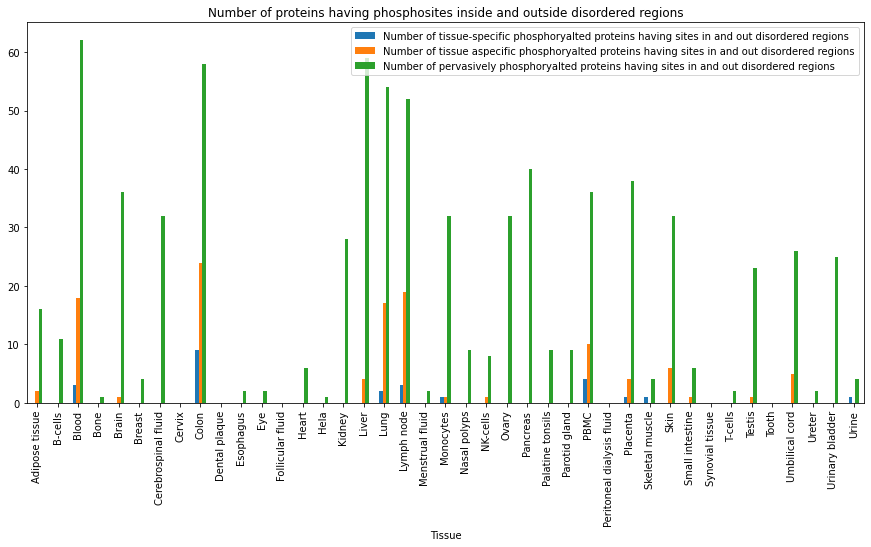

In [54]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_proteins_inandout_in.loc[tspec_proteins_inandout_in[tissue]==1]["ACC_ID"].nunique()
    count_taspec = taspec_proteins_inandout_in.loc[taspec_proteins_inandout_in[tissue]==1]["ACC_ID"].nunique()
    count_gen = gen_proteins_inandout_in.loc[gen_proteins_inandout_in[tissue]==1]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphoryalted proteins having sites in and out disordered regions": tspec_counts,
                             "Number of tissue aspecific phosphoryalted proteins having sites in and out disordered regions": taspec_counts,
                             "Number of pervasively phosphoryalted proteins having sites in and out disordered regions": gen_counts})
distr_tissues_both.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of proteins having phosphosites inside and outside disordered regions")

# Comparison of the frequency of disorderedness on the protein level with UniProtKB proteins

In [55]:
#not rerun (only this block)
for i in range(28):
    proteins_mobi.drop(i, axis=1, inplace=True)
    print(i)
proteins_mobi

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,32
1,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,39
2,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,47
3,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,65
4,P31946,curated-disorder-ideal,"1..2,71..75,233..246",0.085,21,246,66
...,...,...,...,...,...,...,...
16132,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,29
16133,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,77
16134,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,78
16135,Q13085,curated-disorder-priority,"78..101,268..277,512..523,544..555,617..617,12...",0.050,117,2346,80


In [32]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")

In [33]:
tspec_proteins_mobi1 = pd.merge(tspec_proteins, proteins_mobi, on=["ACC_ID"], how="inner")
print(tspec_proteins_mobi1["ACC_ID"].nunique())
taspec_proteins_mobi1 = pd.merge(taspec_proteins, proteins_mobi, on=["ACC_ID"], how="inner")
print(taspec_proteins_mobi1["ACC_ID"].nunique())
gen_proteins_mobi1 = pd.merge(gen_proteins, proteins_mobi, on=["ACC_ID"], how="inner")
print(gen_proteins_mobi1["ACC_ID"].nunique())

2025
2071
1752


In [34]:
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_mobi = pd.merge(Uniprot["ACC_ID"], mobi, on=["ACC_ID"], how="inner")
print(Uniprot_mobi["ACC_ID"].nunique())

20224


# Proteins with interaction interfaces

See also: https://www.mobidb.org/about/mobidb

In [35]:
mobi1[(((mobi1["feature"].str.contains("lip"))|
               (mobi1["feature"].str.contains("binding_mode")))&(mobi1["feature"].str.contains("prediction")==False))]["feature"].value_counts()

derived-binding_mode_disorder_to_disorder-mobi         4618
derived-binding_mode_disorder_to_disorder-priority     4613
derived-binding_mode_disorder_to_order-mobi            3779
derived-binding_mode_disorder_to_order-priority        3765
derived-lip-merge                                      2248
derived-lip-th_90                                      1757
derived-lip-priority                                   1531
homology-lip-merge                                      621
curated-lip-merge                                       620
curated-lip-priority                                    618
homology-lip-priority                                   588
homology-lip-disprot                                    338
curated-lip-disprot                                     295
curated-lip-dibs                                        268
homology-lip-dibs                                       229
homology-binding_mode_disorder_to_disorder-priority     154
homology-binding_mode_disorder_to_disord

In [36]:
mobi = mobi1[(((mobi1["feature"].str.contains("lip"))|
               (mobi1["feature"].str.contains("binding_mode")))&(mobi1["feature"].str.contains("prediction")==False))]
mobi.rename({"acc": "ACC_ID"}, inplace=True, axis=1)
print(mobi.shape[0])
mobi.head()

27307


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ACC_ID,feature,start..end,content_fraction,content_count,length
3531,A0A7P0Z4D3,homology-lip-ideal,328..378,0.059,51,870
3532,A0A7P0Z4D3,homology-lip-merge,328..378,0.059,51,870
3536,A0A7P0Z4D3,homology-lip-priority,328..378,0.059,51,870
3744,A0A7P0T9D7,homology-lip-dibs,21..39,0.006,19,3418
3745,A0A7P0T9D7,homology-lip-disprot,21..39,0.006,19,3418


In [37]:
mobi1[((mobi1["feature"].str.contains("lip")==False)&(mobi1["feature"].str.contains("binding_mode")==False)|
            (mobi1["feature"].str.contains("prediction")==True))]["feature"].value_counts()

prediction-disorder-espX                               77660
prediction-disorder-th_50                              77629
prediction-disorder-iups                               77579
prediction-disorder-glo                                77356
prediction-disorder-espN                               76060
prediction-disorder-vsl                                69541
prediction-disorder-dis465                             69260
prediction-disorder-disHL                              69260
prediction-disorder-iupl                               62131
homology-domain-merge                                  57280
prediction-lip-anchor                                  57042
homology-domain-pfam                                   53966
prediction-low_complexity-merge                        53261
prediction-low_complexity-seg                          47313
prediction-disorder-espD                               46079
prediction-disorder-mobidb_lite                        34865
homology-domain-gene3d  

In [38]:
data_site_if= pd.read_csv("site_data", sep="\t")
data_site_if.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
proteins_mobi_if = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi_if.shape[0])
proteins_mobi_if.head()

62117


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,32
1,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,39
2,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,47
3,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,65
4,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,66


In [40]:
proteins_mobi1_if = proteins_mobi_if["start..end"].str.split(",", expand=True)

In [41]:
proteins_mobi_if = pd.merge(proteins_mobi_if, proteins_mobi1_if, how="inner", left_index=True, right_index=True)
print(proteins_mobi_if.shape[0])
proteins_mobi_if.head()

62117


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,22,23,24,25,26,27,28,29,30,31
0,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,32,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
1,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,39,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
2,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,47,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
3,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,65,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None
4,P31946,derived-binding_mode_disorder_to_disorder-mobi,240..246,0.028,7,246,66,240..246,None,None,...,None,None,None,None,None,None,None,None,None,None


In [42]:
proteins_mobi_sub_tot_if = pd.DataFrame({})
for i in range (32):
    proteins_mobi_sub = proteins_mobi_if.loc[proteins_mobi_if["UP_POS"].astype(float, copy=False).between(proteins_mobi_if[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi_if[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot_if = proteins_mobi_sub_tot_if.append(proteins_mobi_sub, ignore_index=True)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [43]:
for i in range(32):
    proteins_mobi_sub_tot_if.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot_if.shape[0])
print(proteins_mobi_sub_tot_if["ACC_ID"].nunique())
proteins_mobi_sub_tot_if.head()

7102
885


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P27348,derived-binding_mode_disorder_to_disorder-mobi,232..245,0.057,14,245,232
1,P27348,derived-binding_mode_disorder_to_disorder-prio...,232..245,0.057,14,245,232
2,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,13
3,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,46
4,P22314,derived-binding_mode_disorder_to_disorder-prio...,"1..48,804..815,1058..1058",0.058,61,1058,13


In [44]:
t_spec_prot = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
non_t_spec_prot = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
general_P_prot = pd.read_csv("1.1 general P proteins", sep="\t")

In [45]:
tspec_prot = pd.merge(t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(tspec_prot.shape[0])
print(tspec_prot["ACC_ID"].nunique())
tspec_prot_mobi_if = pd.merge(tspec_prot, proteins_mobi_sub_tot_if, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_prot_mobi_if.shape[0])
print(tspec_prot_mobi_if["ACC_ID"].nunique())
tspec_prot_mobi_if.head()

2794
2029
613
177


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A4D2B0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,61,derived-binding_mode_disorder_to_disorder-mobi,"1..1,52..66,240..266",0.162,43,266
1,A4D2B0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,61,derived-binding_mode_disorder_to_disorder-prio...,"1..1,52..66,240..266",0.162,43,266
2,O00268,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1027,derived-binding_mode_disorder_to_disorder-mobi,"1..582,680..836,1013..1052",0.718,779,1085
3,O00268,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1027,derived-binding_mode_disorder_to_disorder-prio...,"1..582,680..836,1013..1052",0.718,779,1085
4,O14733,0,0,1,0,0,0,0,0,0,...,0,0,0,1,60,curated-lip-disprot,30..100,0.169,71,419


In [46]:
taspec_prot = pd.merge(non_t_spec_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(taspec_prot.shape[0])
print(taspec_prot["ACC_ID"].nunique())
taspec_prot_mobi_if = pd.merge(taspec_prot, proteins_mobi_sub_tot_if, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_prot_mobi_if.shape[0])
print(taspec_prot_mobi_if["ACC_ID"].nunique())
taspec_prot_mobi_if.head()

7371
2074
1997
328


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
1,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,192,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
2,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,194,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244
3,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,194,derived-binding_mode_disorder_to_disorder-prio...,"1..62,165..244",0.582,142,244
4,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,3,226,derived-binding_mode_disorder_to_disorder-mobi,"1..62,165..244",0.582,142,244


In [47]:
gen_prot = pd.merge(general_P_prot, data_site[["ACC_ID", "UP_POS"]], how="left", on="ACC_ID")
print(gen_prot.shape[0])
print(gen_prot["ACC_ID"].nunique())
gen_prot_mobi_if = pd.merge(gen_prot, proteins_mobi_sub_tot_if, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_prot_mobi_if.shape[0])
print(gen_prot_mobi_if["ACC_ID"].nunique())
gen_prot_mobi_if.head()

13738
1752
4492
380


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Ureter,Urinary bladder,Urine,Total,UP_POS,feature,start..end,content_fraction,content_count,length
0,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-lip-disprot,2..33,0.094,32,339
1,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-lip-ideal,1..20,0.059,20,339
2,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-lip-merge,1..33,0.097,33,339
3,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,12,homology-lip-priority,1..33,0.097,33,339
4,A6NMY6,1,0,1,0,0,1,0,0,1,...,0,0,0,13,18,homology-lip-disprot,2..33,0.094,32,339


# Type of feature

We'll now investigate what kind of interactions we're dealing with for each category and per tissue.

<AxesSubplot:title={'center':'Type of annotation for tissue-specific phosphoryalted proteins'}, xlabel='feature'>

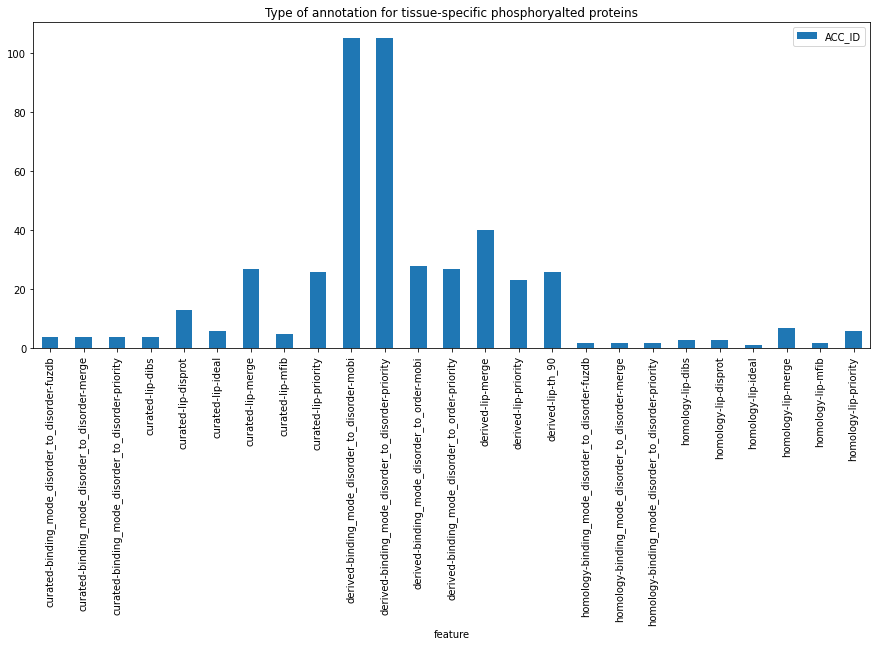

In [48]:
tspec_features = tspec_prot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
tspec_features.plot(x="feature", kind="bar", color="tab:blue", figsize=(15,6), title="Type of annotation for tissue-specific phosphoryalted proteins")

#There is overlap between the different categories

<AxesSubplot:title={'center':'Type of annotation for tissue aspecific phosphorylated proteins'}, xlabel='feature'>

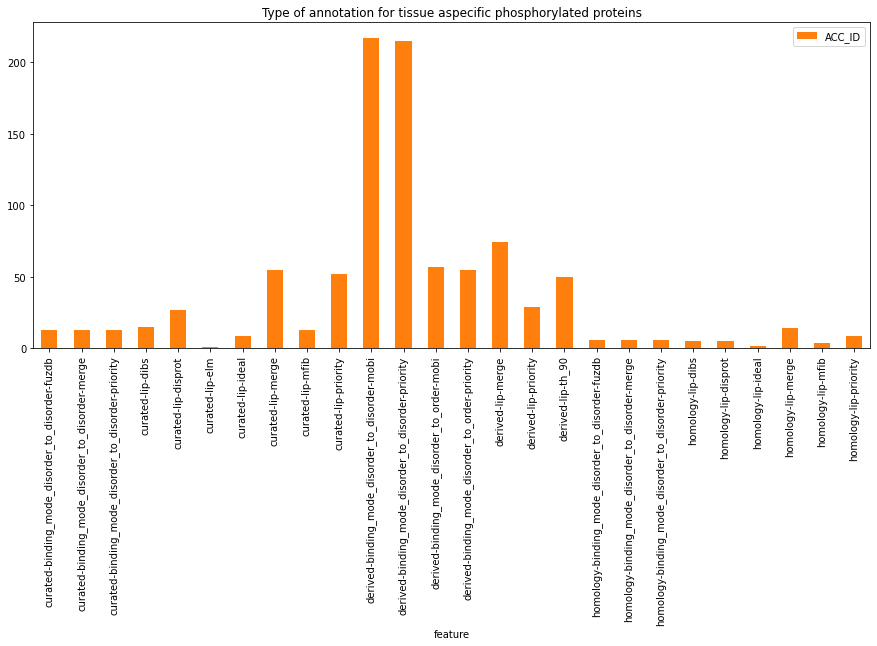

In [49]:
taspec_features = taspec_prot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
taspec_features.plot(x="feature", kind="bar", color="tab:orange", figsize=(15,6), title="Type of annotation for tissue aspecific phosphorylated proteins")

#There is overlap between the different categories

<AxesSubplot:title={'center':'Type of annotation for pervasively phosphorylated proteins'}, xlabel='feature'>

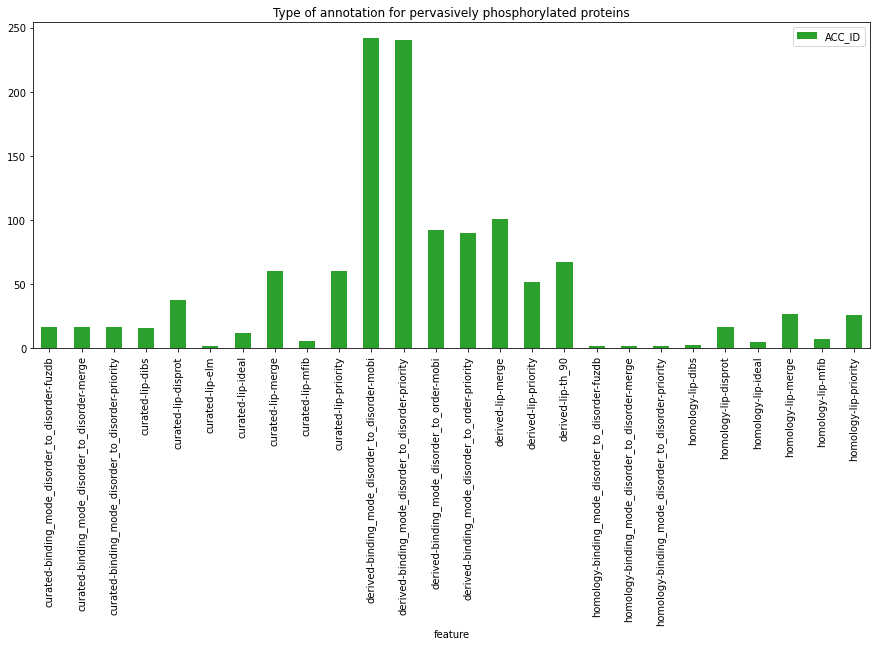

In [50]:
gen_features = gen_prot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
gen_features.plot(x="feature", kind="bar", color="tab:green", figsize=(15,6), title="Type of annotation for pervasively phosphorylated proteins")

#There is overlap between the different categories

<AxesSubplot:title={'center':'Ratio of proteins in each category associated with the three major kinds of annotation'}, xlabel='feature'>

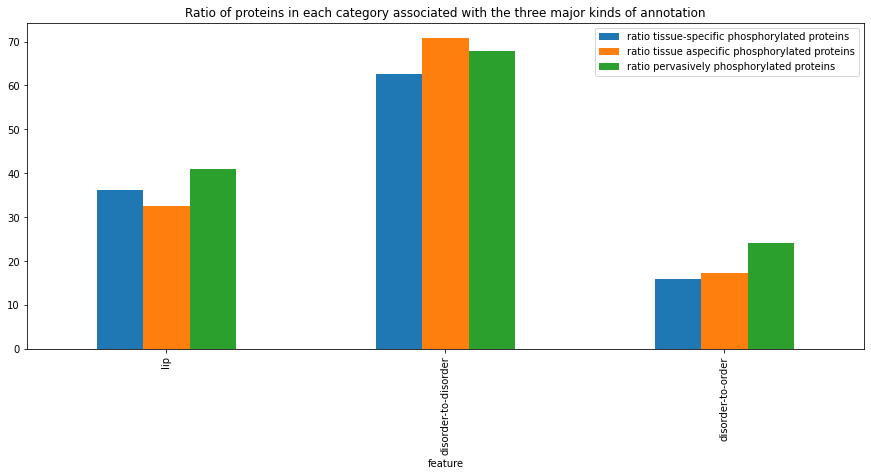

In [51]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspec_prot_mobi_if.loc[tspec_prot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_taspec = taspec_prot_mobi_if.loc[taspec_prot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_gen = gen_prot_mobi_if.loc[gen_prot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    list_tspec.append(count_item_tspec*100/tspec_prot_mobi_if["ACC_ID"].nunique())
    list_taspec.append(count_item_taspec*100/taspec_prot_mobi_if["ACC_ID"].nunique())
    list_gen.append(count_item_gen*100/gen_prot_mobi_if["ACC_ID"].nunique())
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphorylated proteins": list_tspec,
                                  "ratio tissue aspecific phosphorylated proteins": list_taspec,
                                  "ratio pervasively phosphorylated proteins": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(15,6), title="Ratio of proteins in each category associated with the three major kinds of annotation")

<AxesSubplot:title={'center':'Number of proteins having interaction interfaces'}, xlabel='Tissue'>

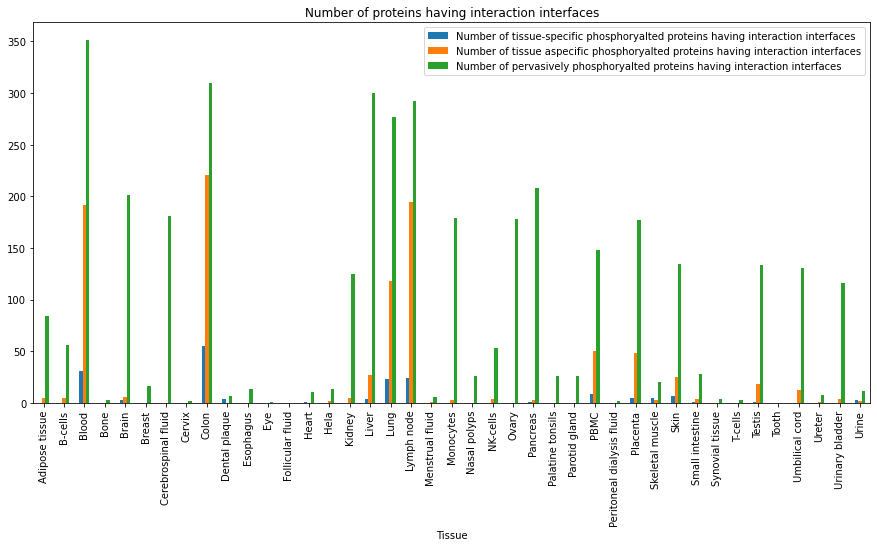

In [52]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[tspec_prot_mobi_if[tissue]==1]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[taspec_prot_mobi_if[tissue]==1]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[gen_prot_mobi_if[tissue]==1]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphoryalted proteins having interaction interfaces": tspec_counts,
                             "Number of tissue aspecific phosphoryalted proteins having interaction interfaces": taspec_counts,
                             "Number of pervasively phosphoryalted proteins having interaction interfaces": gen_counts})
distr_tissues_both.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of proteins having interaction interfaces")

<AxesSubplot:title={'center':'Ratio of proteins associated with lip'}, xlabel='Tissue'>

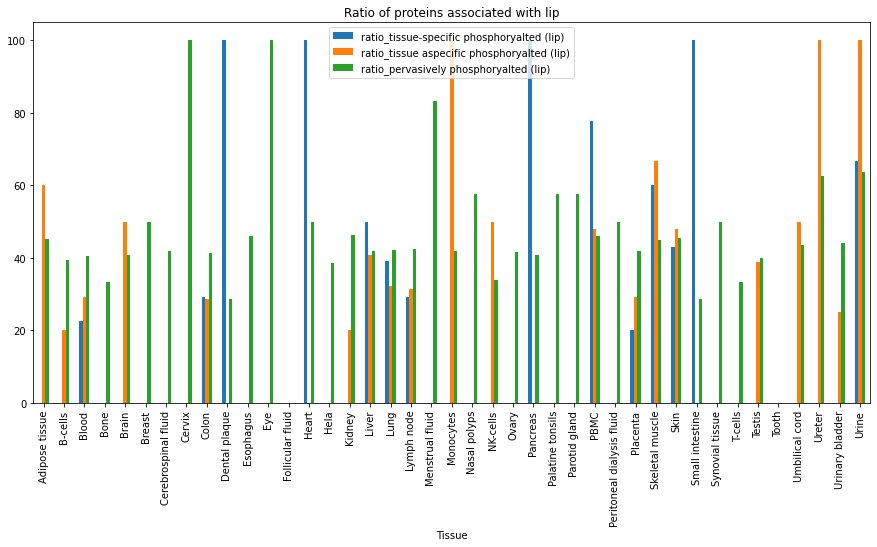

In [53]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[(tspec_prot_mobi_if[tissue]==1)&(tspec_prot_mobi_if["feature"].str.contains("lip"))]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[(taspec_prot_mobi_if[tissue]==1)&(taspec_prot_mobi_if["feature"].str.contains("lip"))]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[(gen_prot_mobi_if[tissue]==1)&(gen_prot_mobi_if["feature"].str.contains("lip"))]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins (lip)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins (lip)"] = taspec_counts
distr_tissues_both["pervasively phosphorylated proteins (lip)"] = gen_counts
distr_tissues_both["ratio_tissue-specific phosphoryalted (lip)"] = distr_tissues_both["tissue-specific phosphorylated proteins (lip)"]*100/distr_tissues_both["Number of tissue-specific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphoryalted (lip)"] = distr_tissues_both["tissue aspecific phosphorylated proteins (lip)"]*100/distr_tissues_both["Number of tissue aspecific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_pervasively phosphoryalted (lip)"] = distr_tissues_both["pervasively phosphorylated proteins (lip)"]*100/distr_tissues_both["Number of pervasively phosphoryalted proteins having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphoryalted (lip)", "ratio_tissue aspecific phosphoryalted (lip)",
                   "ratio_pervasively phosphoryalted (lip)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio of proteins associated with lip")

<AxesSubplot:title={'center':'Ratio proteins associated with disorder-to-disorder transition'}, xlabel='Tissue'>

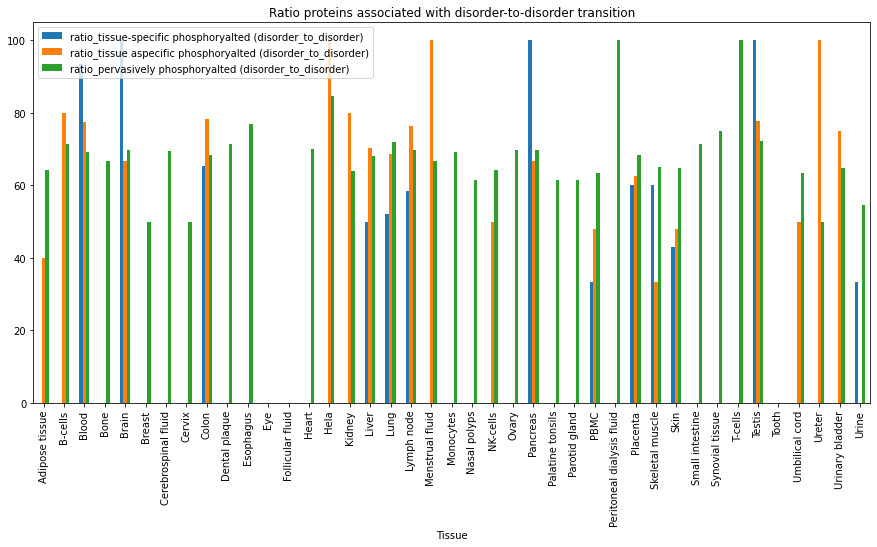

In [54]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[(tspec_prot_mobi_if[tissue]==1)&(tspec_prot_mobi_if["feature"].str.contains("disorder_to_disorder")),:]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[(taspec_prot_mobi_if[tissue]==1)&(taspec_prot_mobi_if["feature"].str.contains("disorder_to_disorder")),:]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[(gen_prot_mobi_if[tissue]==1)&(gen_prot_mobi_if["feature"].str.contains("disorder_to_disorder")),:]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_disorder)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_disorder)"] = taspec_counts
distr_tissues_both["pervasively phosphorylated proteins (disorder_to_disorder)"] = gen_counts

distr_tissues_both["ratio_tissue-specific phosphoryalted (disorder_to_disorder)"] = distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue-specific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphoryalted (disorder_to_disorder)"] = distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_disorder)"]*100/distr_tissues_both["Number of tissue aspecific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_pervasively phosphoryalted (disorder_to_disorder)"] = distr_tissues_both["pervasively phosphorylated proteins (disorder_to_disorder)"]*100/distr_tissues_both["Number of pervasively phosphoryalted proteins having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphoryalted (disorder_to_disorder)", "ratio_tissue aspecific phosphoryalted (disorder_to_disorder)",
                   "ratio_pervasively phosphoryalted (disorder_to_disorder)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio proteins associated with disorder-to-disorder transition")

<AxesSubplot:title={'center':'Ratio proteins associated with disorder-to-order transitions'}, xlabel='Tissue'>

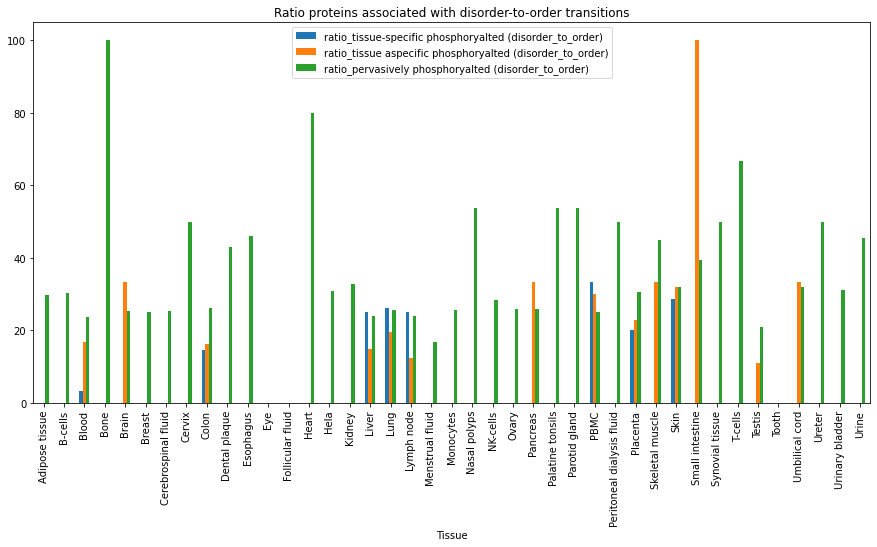

In [55]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    count_tspec = tspec_prot_mobi_if.loc[(tspec_prot_mobi_if[tissue]==1)&(tspec_prot_mobi_if["feature"].str.contains("disorder_to_order")),:]["ACC_ID"].nunique()
    count_taspec = taspec_prot_mobi_if.loc[(taspec_prot_mobi_if[tissue]==1)&(taspec_prot_mobi_if["feature"].str.contains("disorder_to_order")),:]["ACC_ID"].nunique()
    count_gen = gen_prot_mobi_if.loc[(gen_prot_mobi_if[tissue]==1)&(gen_prot_mobi_if["feature"].str.contains("disorder_to_order")),:]["ACC_ID"].nunique()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_order)"] = tspec_counts
distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_order)"] = taspec_counts
distr_tissues_both["pervasively phosphorylated proteins (disorder_to_order)"] = gen_counts


distr_tissues_both["ratio_tissue-specific phosphoryalted (disorder_to_order)"] = distr_tissues_both["tissue-specific phosphorylated proteins (disorder_to_order)"]*100/distr_tissues_both["Number of tissue-specific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_tissue aspecific phosphoryalted (disorder_to_order)"] = distr_tissues_both["tissue aspecific phosphorylated proteins (disorder_to_order)"]*100/distr_tissues_both["Number of tissue aspecific phosphoryalted proteins having interaction interfaces"]
distr_tissues_both["ratio_pervasively phosphoryalted (disorder_to_order)"] = distr_tissues_both["pervasively phosphorylated proteins (disorder_to_order)"]*100/distr_tissues_both["Number of pervasively phosphoryalted proteins having interaction interfaces"]

distr_tissues_both[["Tissue", "ratio_tissue-specific phosphoryalted (disorder_to_order)", "ratio_tissue aspecific phosphoryalted (disorder_to_order)",
                   "ratio_pervasively phosphoryalted (disorder_to_order)"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Ratio proteins associated with disorder-to-order transitions")

# Comparison of the ratio of disorderedness from UniProtKB proteins

In [56]:
tspec_proteins_mobi_if = pd.merge(tspec_proteins, proteins_mobi_if, on=["ACC_ID"], how="inner")
print(tspec_proteins_mobi_if["ACC_ID"].nunique())
taspec_proteins_mobi_if = pd.merge(taspec_proteins, proteins_mobi_if, on=["ACC_ID"], how="inner")
print(taspec_proteins_mobi_if["ACC_ID"].nunique())
gen_proteins_mobi_if = pd.merge(gen_proteins, proteins_mobi_if, on=["ACC_ID"], how="inner")
print(gen_proteins_mobi_if["ACC_ID"].nunique())

Uniprot_if = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot_if.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot_mobi_if = pd.merge(Uniprot_if["ACC_ID"], mobi, on=["ACC_ID"], how="inner")
print(Uniprot_mobi_if["ACC_ID"].nunique())

710
905
859
5601


<AxesSubplot:title={'center':'Feature associated with tissue-specific phosphoryalted proteins'}, xlabel='feature'>

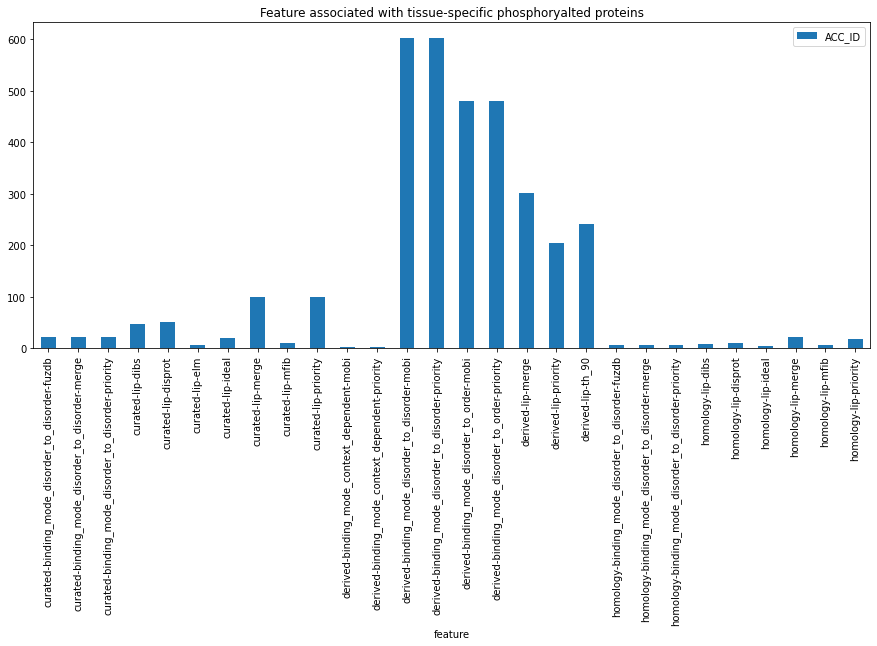

In [57]:
tspec_features = tspec_proteins_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
tspec_features.plot(x="feature", kind="bar", color="tab:blue", figsize=(15,6), title="Feature associated with tissue-specific phosphoryalted proteins")

<AxesSubplot:title={'center':'Features associated with tissue aspecific phosphorylated proteins'}, xlabel='feature'>

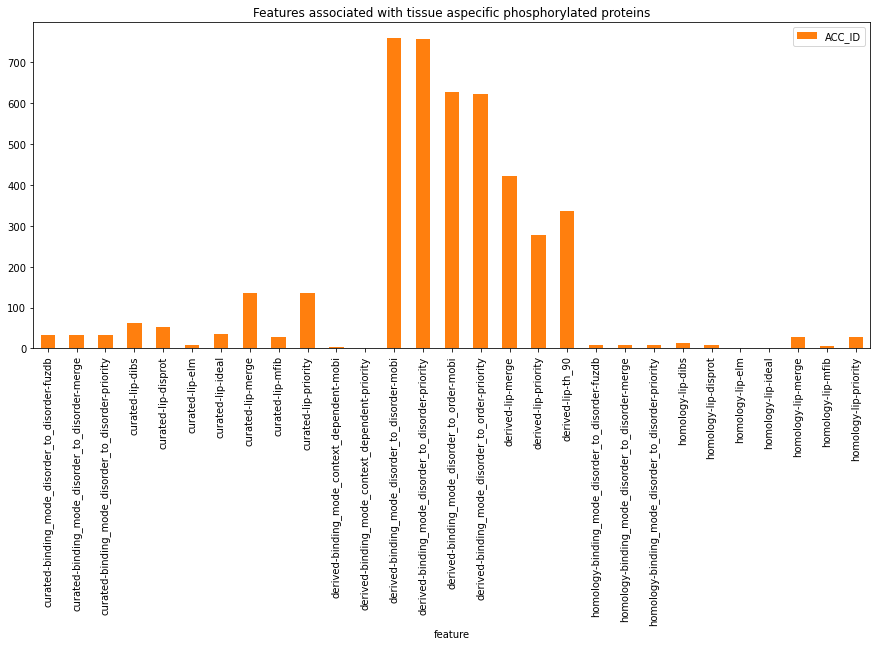

In [58]:
taspec_features = taspec_proteins_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
taspec_features.plot(x="feature", kind="bar", color="tab:orange", figsize=(15,6), title="Features associated with tissue aspecific phosphorylated proteins")

<AxesSubplot:title={'center':'Features associated with pervasively phosphorylated proteins'}, xlabel='feature'>

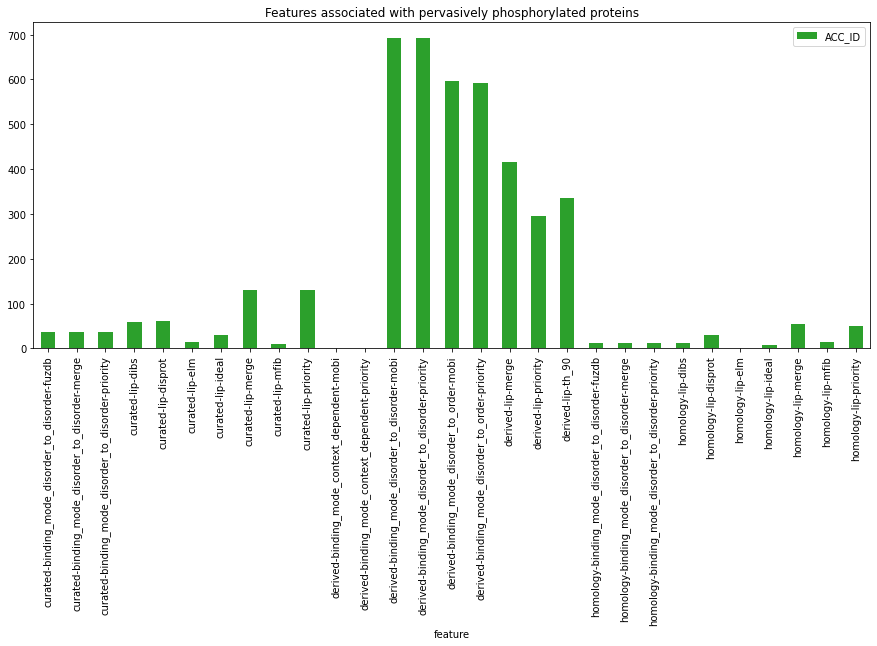

In [59]:
gen_features = gen_proteins_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
gen_features.plot(x="feature", kind="bar", color="tab:green", figsize=(15,6), title="Features associated with pervasively phosphorylated proteins")

<AxesSubplot:title={'center':'Features associated with UniProtKB proteins'}, xlabel='feature'>

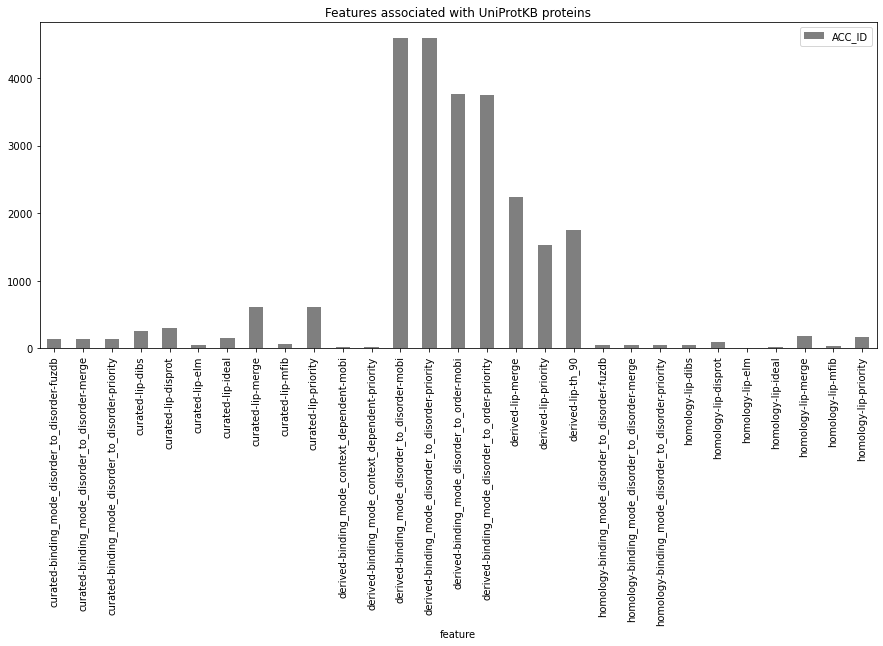

In [60]:
uniprot_features = Uniprot_mobi_if.groupby(["feature"], as_index=False)["ACC_ID"].nunique()
uniprot_features.plot(x="feature", kind="bar", color="tab:grey", figsize=(15,6), title="Features associated with UniProtKB proteins")

In [61]:
print(tspec_proteins_mobi_if["ACC_ID"].nunique()*100/Uniprot_mobi_if["ACC_ID"].nunique())
print(taspec_proteins_mobi_if["ACC_ID"].nunique()*100/Uniprot_mobi_if["ACC_ID"].nunique())
print(gen_proteins_mobi_if["ACC_ID"].nunique()*100/Uniprot_mobi_if["ACC_ID"].nunique())

12.676307802178183
16.157828959114443
15.336547045170505


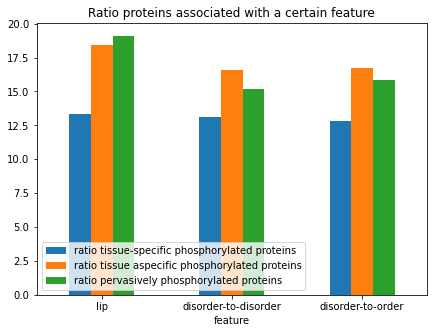

In [62]:
list_tspec = []
list_taspec = []
list_gen = []
for item in ["lip", "disorder_to_disorder", "disorder_to_order"]:
    count_item_tspec = tspec_proteins_mobi_if.loc[tspec_proteins_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_taspec = taspec_proteins_mobi_if.loc[taspec_proteins_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_gen = gen_proteins_mobi_if.loc[gen_proteins_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    count_item_uniprot = Uniprot_mobi_if.loc[Uniprot_mobi_if["feature"].str.contains(item), "ACC_ID"].nunique()
    list_tspec.append(count_item_tspec*100/count_item_uniprot)
    list_taspec.append(count_item_taspec*100/count_item_uniprot)
    list_gen.append(count_item_gen*100/count_item_uniprot)
summarised_features = pd.DataFrame({"feature": ["lip", "disorder-to-disorder", "disorder-to-order"],
                                  "ratio tissue-specific phosphorylated proteins": list_tspec,
                                  "ratio tissue aspecific phosphorylated proteins": list_taspec,
                                  "ratio pervasively phosphorylated proteins": list_gen})
summarised_features.plot(kind="bar", x="feature", figsize=(7,5), title="Ratio proteins associated with a certain feature", rot=0).legend(loc="lower left")
plt.savefig("WP2 MobiDB_ratio phosphoproteins annotated with interaction interfacres.png", format="png", bbox_inches="tight")

In [63]:
summarised_features

,feature,ratio tissue-specific phosphorylated proteins,ratio tissue aspecific phosphorylated proteins,ratio pervasively phosphorylated proteins
0,lip,13.351933,18.413711,19.091271
1,disorder-to-disorder,13.139311,16.563236,15.193666
2,disorder-to-order,12.806177,16.693291,15.867945
